# **Week 8 (Lab 2): Lab Exercises for COMP499/691 Conversational AI**

In this lab, we will adapt a pretrained speech recognizer by performing acoustic and language model adaptation. Specifically, we will use a speech recognizer that has been pretrained on clean sentences extracted from audiobooks spoken by native speakers, such as "`MONTFICHET CALLED OUT FOR ROBIN TO GIVE HIM AN ARM`" or "`YOU HAVE BEEN SO ILL MY POOR RACHEL`" using the Librispeech dataset.

Our goal is to adapt this model to a different scenario that involves command and control. In this scenario, the sentences are uttered in noisy environments by non-native speakers and refer to a different linguistic domain. For example, we need to handle sentences like "`TURN ON THE LIGHT`" or "`TURN DOWN THE BATHROOM TEMPERATURE.`"

We will adapt the pretrained automatic speech recognition (ASR) model in two steps:
- First, we will perform an **acoustic adaptation** by fine-tuning the original model using data from the target domain.
- Second, we will train a **language model** on textual data from the target domain, and use it to rescore the partial hypothesis produced by the beam searcher.

The resulting model will work well in the targeted command and control domain.


Let's first download the dataset that we will use for the adaptation:

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1GycxfFnktJwnMWO_PKpZlMhXWAYIq-rD

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From (original): https://drive.google.com/uc?id=1GycxfFnktJwnMWO_PKpZlMhXWAYIq-rD
From (redirected): https://drive.google.com/uc?id=1GycxfFnktJwnMWO_PKpZlMhXWAYIq-rD&confirm=t&uuid=68128c51-0bc3-442d-bf18-fcedc386a946
To: /content/dataset_lab9.zip
100% 1.55G/1.55G [00:16<00:00, 93.2MB/s]


We can now uncompress it:

In [ ]:
%%capture
!unzip dataset_lab9.zip -d data

Before starting, we also have to install speechbrain:

In [ ]:
%%capture
!git clone https://github.com/speechbrain/speechbrain.git
%cd speechbrain
!pip install -r requirements.txt
!pip install .
%cd ..

## **Exercise 1: Data Preparation**

Please, take a look at the data that have been downloaded in `/content/data`.
The subfolder `/content/data/fluent_speech_commands_dataset/wavs` contain all the wav signal, while the `/content/data/fluent_speech_commands_dataset/data` conitains the annotation. In particular, the transcription of the sentences is contained in the `train_data.csv`, `valid_data.csv`, and `test_data.csv` files. These CSV files, however, are not formatted as those expected by SpeechBrain. For instance, the unique ID file and the duration are missing.

The first exercise requires you to write a function that creates the speechbrain JSON files from the CSV files available.

You have to obtain  `train.json`,`valid.json`, and `test.json` that are formatted as follows:


**train.json**
```
{
  "0_2BqVo8kVB2Skwgyb": {
    "path": "/content/data/fluent_speech_commands_dataset/wavs/speakers/2BqVo8kVB2Skwgyb/0a3129c0-4474-11e9-a9a5-5dbec3b8816a.wav",
    "duration": 1.857625,
    "wrd": "CHANGE LANGUAGE"
  },
  "1_2BqVo8kVB2Skwgyb": {
    "path": "/content/data/fluent_speech_commands_dataset/wavs/speakers/2BqVo8kVB2Skwgyb/0ee42a80-4474-11e9-a9a5-5dbec3b8816a.wav",
    "duration": 1.3931875,
    "wrd": "RESUME"
  },
  "2_2BqVo8kVB2Skwgyb": {
    "path": "/content/data/fluent_speech_commands_dataset/wavs/speakers/2BqVo8kVB2Skwgyb/144d5be0-4474-11e9-a9a5-5dbec3b8816a.wav",
    "duration": 2.13625,
    "wrd": "TURN THE LIGHTS ON"
  },
  ...
```


**valid.json**
```
{
  "0_7NqqnAOPVVSKnxyv": {
    "path": "/content/data/fluent_speech_commands_dataset/wavs/speakers/7NqqnAOPVVSKnxyv/8b863c90-4627-11e9-bc65-55b32b211b66.wav",
    "duration": 2.1333125,
    "wrd": "TURN ON THE LIGHTS"
  },
  "1_7NqqnAOPVVSKnxyv": {
    "path": "/content/data/fluent_speech_commands_dataset/wavs/speakers/7NqqnAOPVVSKnxyv/8d8f7a10-4627-11e9-bc65-55b32b211b66.wav",
    "duration": 1.792,
    "wrd": "TURN OFF THE LIGHTS"
  },
  ...
```


**test.json**
```
{
  "0_4BrX8aDqK2cLZRYl": {
    "path": "/content/data/fluent_speech_commands_dataset/wavs/speakers/4BrX8aDqK2cLZRYl/cbdf5700-452c-11e9-b1e4-e5985dca719e.wav",
    "duration": 3.1573125,
    "wrd": "TURN ON THE LIGHTS"
  },
  "1_4BrX8aDqK2cLZRYl": {
    "path": "/content/data/fluent_speech_commands_dataset/wavs/speakers/4BrX8aDqK2cLZRYl/cff92500-452c-11e9-b1e4-e5985dca719e.wav",
    "duration": 3.2426875,
    "wrd": "TURN OFF THE LIGHTS"
  },
  ...
```

Note that the ID corresponds to the counter available in the first column of the original csv files + '_' + the third column of the original csv file (speakerId).  

The field `wrd` contains the information available in the "transcription" column (just converted such that all the characters are uppercase).

The `duration` can be obtained by dividing the length of the signal by the sampling frequency (16 kHz).

**Complete the code below** to create the three json files:

In [ ]:
import json
import torchaudio
import csv

# Create the data-manifest files
def create_json(data_folder, csv_file,  json_file):
  # Your Code Here

# Set up data folder
data_folder='/content/data/fluent_speech_commands_dataset/'
tr_annotation_file= data_folder + 'data/train_data.csv'
valid_annotation_file= data_folder + 'data/valid_data.csv'
te_annotation_file= data_folder + '/data/test_data.csv'

# Create json files
create_json(data_folder, tr_annotation_file, 'train.json')
create_json(data_folder, valid_annotation_file, 'valid.json')
create_json(data_folder, te_annotation_file, 'test.json')

## **Exercise 2: Acoustic Adaptation**

We can now use the data from the targeted domain to adapt the pretrained ASR. The ASR model that we will use is a hybrid attention+CTC model. The encoder is a CRDNN model, with the CTC loss applied on top of it, as shown in this figure:

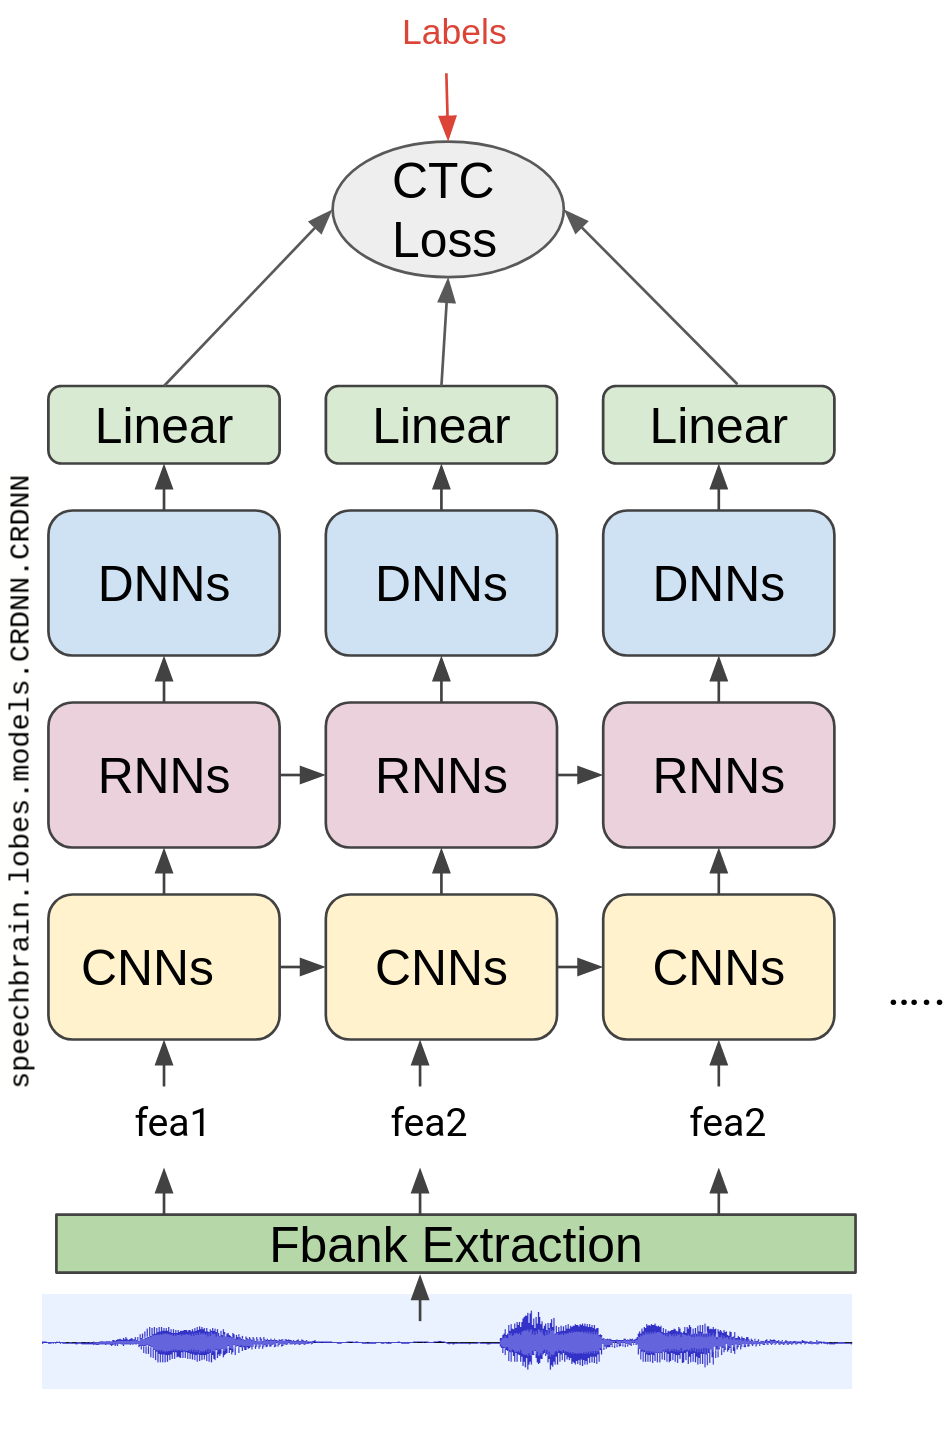

The decoder is a single-layer GRU coupled with attention (implemented in `speechbrain.nnet.RNN.AttentionalRNNDecoder`). The standard negative loglikelihood loss is applied on top of the decoded steps.


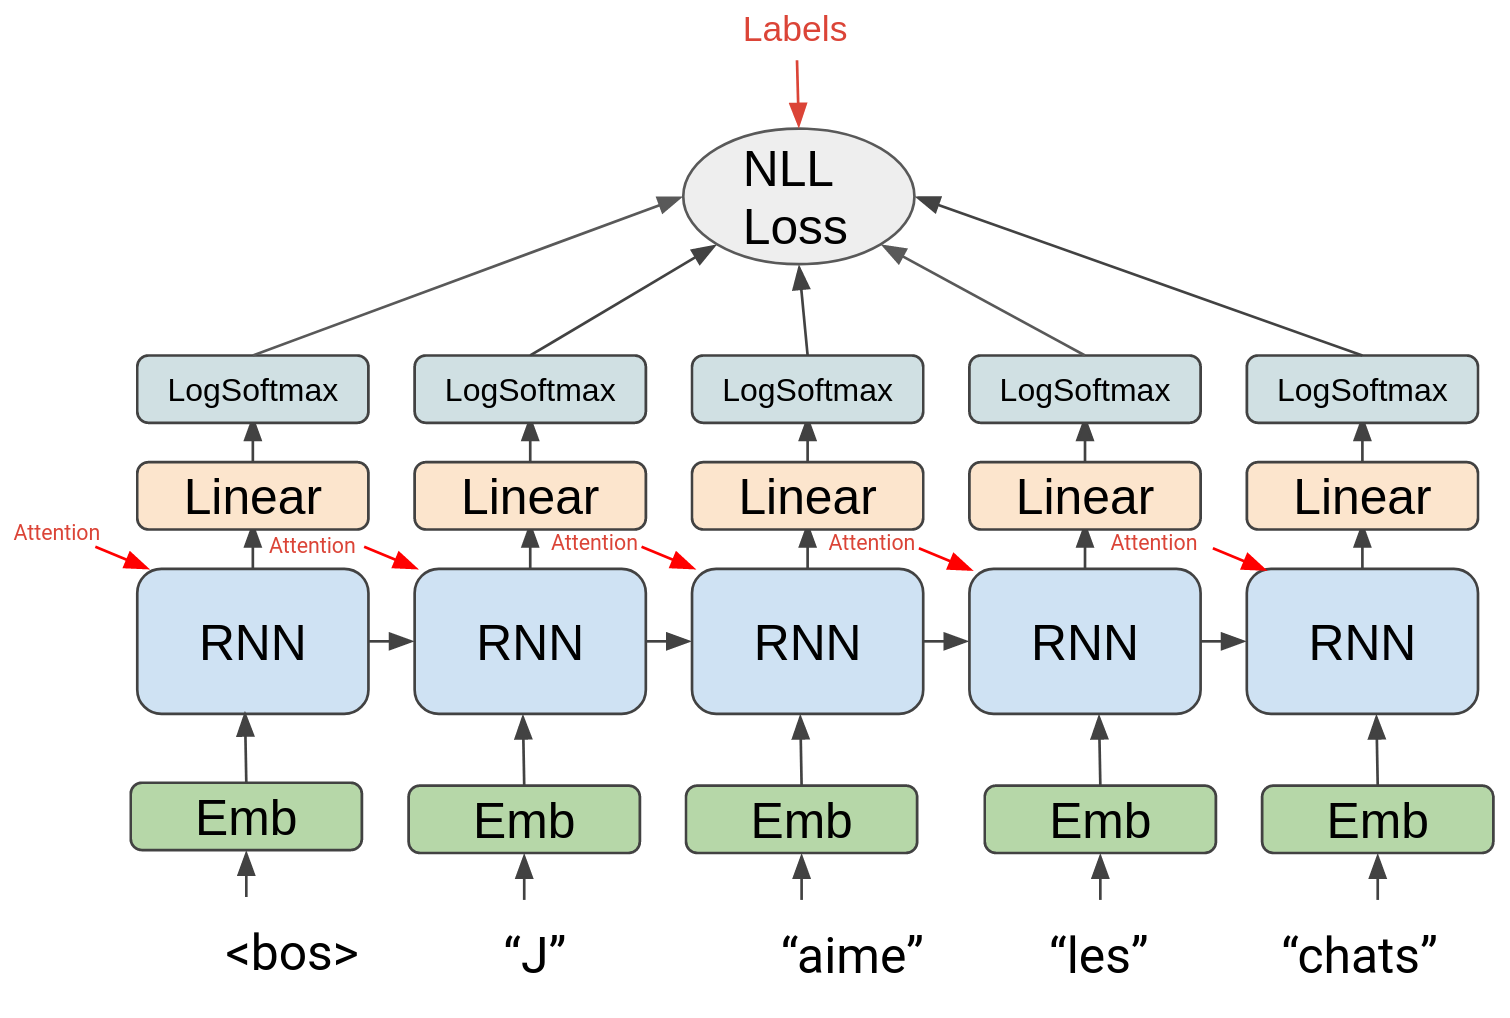

The following hparam file contains all the essential building blocks required to train the model. However, we are not training the model from scratch, but we are pretraining it. To pretrain the model, you need to complete the hparam file given below. The model you need to pretrain is available in the `model` variable defined in the yaml file. Additionally, you also need to pretrain the normalizer (available in `normalize`) and the tokenizer (available in `tokenizer`), using the files provided in the[ SpeechBrain HF repository](https://huggingface.co/speechbrain):




```
- speechbrain/asr-crdnn-rnnlm-librispeech/asr.ckpt
- speechbrain/asr-crdnn-rnnlm-librispeech/tokenizer.ckpt
- speechbrain/asr-crdnn-rnnlm-librispeech/normalizer.ckpt
```


For pretraining, you should use the pretrainer available in `speechbrain.utils.parameter_transfer.Pretrainer`. To learn how to use it correctly, you can refer to the documentation and previous tutorials or available speechbrain recipes.

The following hparam file instantites all the basic building blocks needed to train the model. As mentioned, however, we are not training the model from scratch but we are pretraining.



**Complete the hparam file below** to pretrain the model.


In [ ]:
%%file hparams.yaml

# Seed needs to be set at top of yaml, before objects with parameters
seed: 1986
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/CRDNN/<seed>
wer_file: !ref <output_folder>/wer.txt
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Tokenizer (# Fetches from HuggingFace https://huggingface.co/speechbrain)
pretrained_asr_path: speechbrain/asr-crdnn-rnnlm-librispeech
tokenizer_path: speechbrain/asr-crdnn-rnnlm-librispeech

# Data files
train_json: train.json
valid_json: valid.json
test_json: test.json

# Training parameters
number_of_epochs: 2
number_of_ctc_epochs: 2
batch_size: 16
lr: 0.1
ctc_weight: 0.5
sorting: ascending

# Select only n_sentences (for computational efficiency)
select_n_train: 1000
select_n_valid: 200
select_n_test: 200

# Feature parameters
sample_rate: 16000
n_fft: 400
n_mels: 40

opt_class: !name:torch.optim.Adadelta
   lr: !ref <lr>
   rho: 0.95
   eps: 1.e-8

# Dataloader options
train_dataloader_opts:
   batch_size: !ref <batch_size>

valid_dataloader_opts:
   batch_size: !ref <batch_size>

test_dataloader_opts:
   batch_size: !ref <batch_size>

# Model parameters
activation: !name:torch.nn.LeakyReLU
dropout: 0.15
cnn_blocks: 2
cnn_channels: (128, 256)
inter_layer_pooling_size: (2, 2)
cnn_kernelsize: (3, 3)
time_pooling_size: 4
rnn_class: !name:speechbrain.nnet.RNN.LSTM
rnn_layers: 4
rnn_neurons: 1024
rnn_bidirectional: True
dnn_blocks: 2
dnn_neurons: 512
emb_size: 128
dec_neurons: 1024
output_neurons: 1000  # Number of tokens (same as LM)
blank_index: 0
bos_index: 0
eos_index: 0


# Decoding parameters
min_decode_ratio: 0.0
max_decode_ratio: 1.0
valid_beam_size: 1
test_beam_size: 1
eos_threshold: 1.5
using_max_attn_shift: True
max_attn_shift: 240
temperature: 1.25
coverage_penalty: 1.5


epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
   limit: !ref <number_of_epochs>

normalize: !new:speechbrain.processing.features.InputNormalization
   norm_type: global

compute_features: !new:speechbrain.lobes.features.Fbank
   sample_rate: !ref <sample_rate>
   n_fft: !ref <n_fft>
   n_mels: !ref <n_mels>

enc: !new:speechbrain.lobes.models.CRDNN.CRDNN
   input_shape: [null, null, !ref <n_mels>]
   activation: !ref <activation>
   dropout: !ref <dropout>
   cnn_blocks: !ref <cnn_blocks>
   cnn_channels: !ref <cnn_channels>
   cnn_kernelsize: !ref <cnn_kernelsize>
   inter_layer_pooling_size: !ref <inter_layer_pooling_size>
   time_pooling: True
   using_2d_pooling: False
   time_pooling_size: !ref <time_pooling_size>
   rnn_class: !ref <rnn_class>
   rnn_layers: !ref <rnn_layers>
   rnn_neurons: !ref <rnn_neurons>
   rnn_bidirectional: !ref <rnn_bidirectional>
   rnn_re_init: True
   dnn_blocks: !ref <dnn_blocks>
   dnn_neurons: !ref <dnn_neurons>
   use_rnnp: False

emb: !new:speechbrain.nnet.embedding.Embedding
   num_embeddings: !ref <output_neurons>
   embedding_dim: !ref <emb_size>

dec: !new:speechbrain.nnet.RNN.AttentionalRNNDecoder
   enc_dim: !ref <dnn_neurons>
   input_size: !ref <emb_size>
   rnn_type: gru
   attn_type: location
   hidden_size: !ref <dec_neurons>
   attn_dim: 1024
   num_layers: 1
   scaling: 1.0
   channels: 10
   kernel_size: 100
   re_init: True
   dropout: !ref <dropout>

ctc_lin: !new:speechbrain.nnet.linear.Linear
   input_size: !ref <dnn_neurons>
   n_neurons: !ref <output_neurons>

seq_lin: !new:speechbrain.nnet.linear.Linear
   input_size: !ref <dec_neurons>
   n_neurons: !ref <output_neurons>

log_softmax: !new:speechbrain.nnet.activations.Softmax
   apply_log: True

ctc_cost: !name:speechbrain.nnet.losses.ctc_loss
   blank_index: !ref <blank_index>

seq_cost: !name:speechbrain.nnet.losses.nll_loss
   label_smoothing: 0.1


tokenizer: !new:sentencepiece.SentencePieceProcessor

# Models
modules:
   enc: !ref <enc>
   emb: !ref <emb>
   dec: !ref <dec>
   ctc_lin: !ref <ctc_lin>
   seq_lin: !ref <seq_lin>
   normalize: !ref <normalize>

model: !new:torch.nn.ModuleList
   - [!ref <enc>, !ref <emb>, !ref <dec>, !ref <ctc_lin>, !ref <seq_lin>]

############################## Decoding & optimiser ############################

coverage_scorer: !new:speechbrain.decoders.scorer.CoverageScorer
   vocab_size: !ref <output_neurons>


scorer: !new:speechbrain.decoders.scorer.ScorerBuilder
   full_scorers: [!ref <coverage_scorer>]
   weights:
      coverage: !ref <coverage_penalty>

# Search
valid_search: !new:speechbrain.decoders.S2SRNNBeamSearcher
   embedding: !ref <emb>
   decoder: !ref <dec>
   linear: !ref <seq_lin>
   bos_index: !ref <bos_index>
   eos_index: !ref <eos_index>
   min_decode_ratio: !ref <min_decode_ratio>
   max_decode_ratio: !ref <max_decode_ratio>
   beam_size: !ref <valid_beam_size>
   eos_threshold: !ref <eos_threshold>
   using_max_attn_shift: !ref <using_max_attn_shift>
   max_attn_shift: !ref <max_attn_shift>
   temperature: !ref <temperature>

test_search: !new:speechbrain.decoders.S2SRNNBeamSearcher
   embedding: !ref <emb>
   decoder: !ref <dec>
   linear: !ref <seq_lin>
   bos_index: !ref <bos_index>
   eos_index: !ref <eos_index>
   min_decode_ratio: !ref <min_decode_ratio>
   max_decode_ratio: !ref <max_decode_ratio>
   beam_size: !ref <test_beam_size>
   eos_threshold: !ref <eos_threshold>
   using_max_attn_shift: !ref <using_max_attn_shift>
   max_attn_shift: !ref <max_attn_shift>
   temperature: !ref <temperature>
   scorer: !ref <scorer>


lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
   initial_value: !ref <lr>
   improvement_threshold: 0.0025
   annealing_factor: 0.8
   patient: 0

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
   checkpoints_dir: !ref <save_folder>
   recoverables:
      model: !ref <model>
      scheduler: !ref <lr_annealing>
      normalizer: !ref <normalize>
      counter: !ref <epoch_counter>

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
   save_file: !ref <train_log>

error_rate_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats

cer_computer: !name:speechbrain.utils.metric_stats.ErrorRateStats
   split_tokens: True

# The pretrainer allows a mapping between pretrained files and instances that
# are declared in the yaml. E.g here, we will download the file asr.ckpt
# and it will be loaded into "model" which is pointing to the <model> defined
# before.

# Your code here

Overwriting hparams.yaml


The training file below combines the fundamental components specified in the yaml file and fine-tunes the ASR model using the data that is currently available.

To perform pretraining, please complete the code below by correctly calling the pretainer object specified in the yaml file. You can refer to previous tutorials or use speechbrain recipes that demonstrate how to perform pretraining.

**Complete the code below**

In [ ]:
%%file train.py

import os
import sys
import torch
import logging
import speechbrain as sb
from speechbrain.utils.distributed import run_on_main
from hyperpyyaml import load_hyperpyyaml
from pathlib import Path

logger = logging.getLogger(__name__)


# Define training procedure
class ASR(sb.Brain):
    def compute_forward(self, batch, stage):
        """Forward computations from the waveform batches to the output probabilities."""
        batch = batch.to(self.device)
        wavs, wav_lens = batch.sig
        tokens_bos, _ = batch.tokens_bos
        wavs, wav_lens = wavs.to(self.device), wav_lens.to(self.device)

        # Forward pass
        feats = self.hparams.compute_features(wavs)
        feats = self.modules.normalize(feats, wav_lens)
        x = self.modules.enc(feats.detach())
        e_in = self.modules.emb(tokens_bos)  # y_in bos + tokens
        h, _ = self.modules.dec(e_in, x, wav_lens)

        # Output layer for seq2seq log-probabilities
        logits = self.modules.seq_lin(h)
        p_seq = self.hparams.log_softmax(logits)

        # Compute outputs
        if stage == sb.Stage.TRAIN:
            current_epoch = self.hparams.epoch_counter.current
            if current_epoch <= self.hparams.number_of_ctc_epochs:
                # Output layer for ctc log-probabilities
                logits = self.modules.ctc_lin(x)
                p_ctc = self.hparams.log_softmax(logits)
                return p_ctc, p_seq, wav_lens
            else:
                return p_seq, wav_lens
        else:
            if stage == sb.Stage.VALID:
                # Get token strings from index prediction
                p_tokens, _, _, _ = self.hparams.valid_search(x, wav_lens)
            else:
                p_tokens, _, _, _ = self.hparams.test_search(x, wav_lens)
            return p_seq, wav_lens, p_tokens

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss (CTC+NLL) given predictions and targets."""

        current_epoch = self.hparams.epoch_counter.current
        if stage == sb.Stage.TRAIN:
            if current_epoch <= self.hparams.number_of_ctc_epochs:
                p_ctc, p_seq, wav_lens = predictions
            else:
                p_seq, wav_lens = predictions
        else:
            p_seq, wav_lens, predicted_tokens = predictions

        ids = batch.id
        tokens_eos, tokens_eos_lens = batch.tokens_eos
        tokens, tokens_lens = batch.tokens

        loss_seq = self.hparams.seq_cost(
            p_seq, tokens_eos, length=tokens_eos_lens
        )

        # Add ctc loss if necessary
        if (
            stage == sb.Stage.TRAIN
            and current_epoch <= self.hparams.number_of_ctc_epochs
        ):
            loss_ctc = self.hparams.ctc_cost(
                p_ctc, tokens, wav_lens, tokens_lens
            )
            loss = self.hparams.ctc_weight * loss_ctc
            loss += (1 - self.hparams.ctc_weight) * loss_seq
        else:
            loss = loss_seq

        if stage != sb.Stage.TRAIN:
            # Decode token terms to words
            predicted_words = [
                self.tokenizer.decode_ids(utt_seq).split(" ")
                for utt_seq in predicted_tokens
            ]
            target_words = [wrd.split(" ") for wrd in batch.wrd]
            self.wer_metric.append(ids, predicted_words, target_words)
            self.cer_metric.append(ids, predicted_words, target_words)

        return loss

    def evaluate_batch(self, batch, stage):
        """Computations needed for validation/test batches"""
        predictions = self.compute_forward(batch, stage=stage)
        with torch.no_grad():
            loss = self.compute_objectives(predictions, batch, stage=stage)
        return loss.detach()

    def on_stage_start(self, stage, epoch):
        """Gets called at the beginning of each epoch"""
        if stage != sb.Stage.TRAIN:
            self.cer_metric = self.hparams.cer_computer()
            self.wer_metric = self.hparams.error_rate_computer()

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a epoch."""
        # Compute/store important stats
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats
        else:
            stage_stats["CER"] = self.cer_metric.summarize("error_rate")
            stage_stats["WER"] = self.wer_metric.summarize("error_rate")

        # Perform end-of-iteration things, like annealing, logging, etc.
        if stage == sb.Stage.VALID:
            old_lr, new_lr = self.hparams.lr_annealing(stage_stats["WER"])
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta={"WER": stage_stats["WER"]}, min_keys=["WER"],
            )
        elif stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stage_stats,
            )
            with open(self.hparams.wer_file, "w") as w:
                self.wer_metric.write_stats(w)


def dataio_prepare(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions."""
    # 1. Declarations:
    train_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["train_json"],
    )
    if hparams["sorting"] == "ascending":
        # we sort training data to speed up training and get better results.
        train_data = train_data.filtered_sorted(sort_key="duration", select_n=hparams["select_n_train"])
        # when sorting do not shuffle in dataloader ! otherwise is pointless
        hparams["train_dataloader_opts"]["shuffle"] = False

    elif hparams["sorting"] == "descending":
        train_data = train_data.filtered_sorted(
            sort_key="duration", reverse=True
        )
        # when sorting do not shuffle in dataloader ! otherwise is pointless
        hparams["train_dataloader_opts"]["shuffle"] = False

    elif hparams["sorting"] == "random":
        pass

    else:
        raise NotImplementedError(
            "sorting must be random, ascending or descending"
        )

    valid_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["valid_json"],
    )
    valid_data = valid_data.filtered_sorted(sort_key="duration",  select_n=hparams["select_n_valid"])

    test_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["test_json"],
    )
    test_data = test_data.filtered_sorted(sort_key="duration",  select_n=hparams["select_n_test"])


    datasets = [train_data, valid_data, test_data]

    # We get the tokenizer as we need it to encode the labels when creating
    # mini-batches.
    tokenizer = hparams["tokenizer"]

    # 2. Define audio pipeline:
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(path):
        sig = sb.dataio.dataio.read_audio(path)
        return sig

    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline)

    # 3. Define text pipeline:
    @sb.utils.data_pipeline.takes("wrd")
    @sb.utils.data_pipeline.provides(
        "wrd", "tokens_list", "tokens_bos", "tokens_eos", "tokens"
    )
    def text_pipeline(wrd):
        yield wrd
        tokens_list = tokenizer.encode_as_ids(wrd)
        yield tokens_list
        tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
        yield tokens_bos
        tokens_eos = torch.LongTensor(tokens_list + [hparams["eos_index"]])
        yield tokens_eos
        tokens = torch.LongTensor(tokens_list)
        yield tokens

    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(
        datasets, ["id", "sig", "wrd", "tokens_bos", "tokens_eos", "tokens"],
    )

    return (
        train_data,
        valid_data,
        test_data,
    )


if __name__ == "__main__":

    # CLI:
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hparams
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # here we create the datasets objects as well as tokenization and encoding
    (
        train_data,
        valid_data,
        test_data,
    ) = dataio_prepare(hparams)

    # We download the pretrained ASR from HuggingFace (or elsewhere depending on
    # the path given in the YAML file). The tokenizer is loaded at the same time.

    # Your Code Here


    # Trainer initialization
    asr_brain = ASR(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # We dynamicaly add the tokenizer to our brain class.
    # NB: This tokenizer corresponds to the one used for the ASR models.
    asr_brain.tokenizer = hparams["tokenizer"]

    # Training
    asr_brain.fit(
        asr_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

    # Testing
    asr_brain.evaluate(
        test_data,
        min_key="WER",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )

Overwriting train.py


Let's first evaluate the performance without doing any epoch of adaptation. This can be done by manually setting the number of epochs to zero from the command line.

**Run the following code** to get the test performance achieved by the model without any acoustic adaptation.

In [ ]:
!python train.py hparams.yaml --output_folder='results/CRDNN' --number_of_epochs=0

If everything works well you should obtain a performance on the test set similar to this:

`speechbrain.utils.train_logger - Epoch loaded: 0 - test loss: 1.34, test CER: 9.05, test WER: 16.13`

Without any adaptation, the system reaches a word error rate  (WER) of around 16\%. Feel free to take at the wer file available in `results/CRDNN` to take a look at errors done by the system on each test sentence.


**Run the following code** to fine-tune the model for one epoch:

In [ ]:
!python train.py hparams.yaml --output_folder='results/CRDNN_adapt' --number_of_epochs=1

If everything goes well, you should observe a significant performance improvement. You should obtain something similar to:

`speechbrain.utils.train_logger - Epoch loaded: 1 - test loss: 1.24, test CER: 3.44, test WER: 6.29`


Feel free to take at the WER file available in `results/CRDNN_adapt` to take a look at errors done by the system on each test sentence.

Up until now, we have only used greedy search in decoding, as specified by the `test_beam_size` value of 1 in the yaml file. To enhance the model's performance, we can try using a larger beam, such as 16 alternatives for each decoding step.

It's important to note that we don't need to train the model from scratch to enable beamsearch with a larger beam size. We only need to change a parameter in the beamsearch.

**Complete the command below** to enable beamsearch with a `test_beam_size` of 16. You simply need to add one more flag at the end of the command shown below:

In [ ]:
!python train.py hparams.yaml --output_folder='results/CRDNN_adapt' --number_of_epochs=1 --number_of_ctc_epochs=1 --test_beam_size=16 #Add one flag here

You should see another performance improvement. In particular, the WER on the test set should be around 5.5\%:

`speechbrain.utils.train_logger - Epoch loaded: 1 - test loss: 1.24, test CER: 2.89, test WER: 5.49`

## **Exercise 3: Train a Language Model**

To further enhance the model's performance on the target domain, we can train a language model and use it to rescore the partial hypotheses generated by the beamsearcher.

For this purpose, we can use a simple RNN implemented in `speechbrain.lobes.models.RNNLM.RNNLM`. This time we train the model on top of text data. We will use the training transcriptions available in the json file.

You have to complete the code below. In particular, you need to allocate the RNN model. You have to use  `speechbrain.lobes.models.RNNLM.RNNLM` with the following hyperparameters:


```
emb_size: 128
activation: !name:torch.nn.LeakyReLU
dropout: 0.0
rnn_layers: 2
rnn_neurons: 2048
dnn_blocks: 1
dnn_neurons: 512
```

Additionally, you need to define and pretrain the same tokenizer that was used in the previous exercise. You can use the pretrainer method available in SpeechBrain to accomplish this. It's crucial to use the same tokenizer in both the ASR and language models to avoid harmful mismatches.

**Complete the yaml file below**

In [ ]:
%%file hparams_lm.yaml

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/RNNLM/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Tokenizer (# Fetches from HuggingFace https://huggingface.co/speechbrain)
tokenizer_path: speechbrain/asr-crdnn-rnnlm-librispeech

# Data files
train_json: train.json
valid_json: valid.json
test_json: test.json

# Select only n_sentences (for computational efficiency)
select_n_train: 10000
select_n_valid: 200
select_n_test: 200

# Training parameters
number_of_epochs: 5
batch_size: 16
lr: 0.001

# Dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    shuffle: True

valid_dataloader_opts:
    batch_size: 1

test_dataloader_opts:
    batch_size: 1

# Model parameters
emb_size: 128
activation: !name:torch.nn.LeakyReLU
dropout: 0.0
rnn_layers: 2
rnn_neurons: 2048
dnn_blocks: 1
dnn_neurons: 512

# Outputs
output_neurons: 1000 # index(eos/bos) = 0
bos_index: 0
eos_index: 0


# Functions
model: # Your code here


modules:
    model: !ref <model>

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        scheduler: !ref <lr_annealing>
        counter: !ref <epoch_counter>

log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
    betas: (0.9, 0.98)
    eps: 0.000000001

lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

compute_cost: !name:speechbrain.nnet.losses.nll_loss

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

# Your code here for defining and pretrain the tokenizer

Writing hparams_lm.yaml


Now, you need to complete the training script. In particular, you need to complete the model in the `compute_forward` method. Once you have obtained the logits from the model, you should apply the log-softmax function (that is defined in the hparam file).

In the `compute_objective `function, you need to compute the loss using the one specified in the hparam file. Be sure to pass the length argument to avoid computing it in zero-padded elements.

**Complete the code below** to train the language model:

In [ ]:
%%file train_lm.py
import os
import sys
import logging
import glob
import torch
from hyperpyyaml import load_hyperpyyaml
import speechbrain as sb
from speechbrain.utils.distributed import run_on_main


logger = logging.getLogger(__name__)


# Define training procedure
class LM(sb.core.Brain):
    def compute_forward(self, batch, stage):
        """Forward computations from the sentence batches to the output probabilities."""
        batch = batch.to(self.device)
        tokens_bos, _ = batch.tokens_bos
        logits = # Your code here
        pred = # Your code here (log-softmax)
        return pred

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given predictions and targets."""
        batch = batch.to(self.device)
        tokens_eos, tokens_len = batch.tokens_eos
        loss = # Your code here
        return loss

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a epoch."""
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats

        if stage == sb.Stage.VALID and sb.utils.distributed.if_main_process():
            if not (
                isinstance(
                    self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
                )
                or isinstance(
                    self.hparams.lr_annealing,
                    sb.nnet.schedulers.CyclicCosineScheduler,
                )
            ):
                old_lr, new_lr = self.hparams.lr_annealing(stage_loss)
                sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            else:
                old_lr = self.hparams.lr_annealing.current_lr

            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta=stage_stats, min_keys=["loss"],
            )


def dataio_prepare(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions."""
    # 1. Declarations:
    train_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["train_json"],
    )
    train_data = train_data.filtered_sorted(select_n=hparams["select_n_train"])

    valid_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["valid_json"],
    )
    valid_data = valid_data.filtered_sorted(select_n=hparams["select_n_valid"])

    test_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["test_json"],
    )
    test_data = test_data.filtered_sorted(select_n=hparams["select_n_test"])

    datasets = [train_data, valid_data, test_data]

    # We get the tokenizer as we need it to encode the labels when creating
    # mini-batches.
    tokenizer = hparams["tokenizer"]

    """Define text pipeline"""
    @sb.utils.data_pipeline.takes("wrd")
    @sb.utils.data_pipeline.provides("wrd", "tokens_bos", "tokens_eos")
    def text_pipeline(wrd):
        yield wrd
        tokens_list = tokenizer.encode_as_ids(wrd)
        tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
        yield tokens_bos
        tokens_eos = torch.LongTensor(tokens_list + [hparams["eos_index"]])
        yield tokens_eos

    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(
        datasets, ["id", "wrd", "tokens_bos", "tokens_eos"],
    )
    return train_data, valid_data, test_data


if __name__ == "__main__":
    # CLI:
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # If --distributed_launch then
    # create ddp_group with the right communication protocol
    sb.utils.distributed.ddp_init_group(run_opts)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # here we create the dataloader objects as well as tokenization and encoding
    train_data, valid_data, test_data = dataio_prepare(hparams)

    # We download the tokenizer from HuggingFace (or elsewhere depending on
    # the path given in the YAML file).
    run_on_main(hparams["pretrainer"].collect_files)
    hparams["pretrainer"].load_collected()

    lm_brain = LM(
        modules=hparams["modules"],
        opt_class=hparams["optimizer"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    lm_brain.fit(
        lm_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

Overwriting train_lm.py


**Run the command below** to train the language model:

In [ ]:
!python train_lm.py hparams_lm.yaml --output_folder='results/LM'

If everything is implemented correctly, you should obtain training and validation losses similar to these:

```
epoch: 1, lr: 1.00e-03 - train loss: 7.51e-01 - valid loss: 7.07e-01
epoch: 2, lr: 1.00e-03 - train loss: 5.81e-01 - valid loss: 6.97e-01
epoch: 3, lr: 1.00e-03 - train loss: 5.71e-01 - valid loss: 6.77e-01
epoch: 4, lr: 1.00e-03 - train loss: 5.65e-01 - valid loss: 6.78e-01
epoch: 5, lr: 8.00e-04 - train loss: 5.59e-01 - valid loss: 6.74e-01
```


We can now copy the learned language model into another folder (that will be used later):

In [ ]:
!cp /content/results/LM/save/CKPT*/model.ckpt /content/results/LM/lm_model.ckpt

## **Exercise 4: Beamsearch with Language Model**

Now, we're ready to combine the language model we've trained with the ASR model we trained earlier. The easiest way to integrate a language model into a speech recognizer is to use it to rescore the partial hypotheses generated by the beamsearcher.


To integrate the language model into the ASR model, you can copy-and-paste the hparam file from Exercise 2 with a few modifications:

- Define the language model object (`lm_model`) and pretrain it using the model stored in `/content/results/LM/lm_model.ckpt` (from Exercise 3). Use `return_hidden: True` as a new hyperparameter of `lm_model`. This will make sure the code is working properly when called by the beamsearcher.

- Add a proper scorer for the language model. You can draw inspiration from what done [here](https://github.com/speechbrain/speechbrain/blob/develop/recipes/LibriSpeech/ASR/seq2seq/hparams/train_BPE_1000.yaml).
Please set `lm_weight: 0.50` and `temperature_lm: 1.25`. For all the other beamsearch hyperparameters, please use the same values used in Exercise 2.

- Make sure to add `lm_model` in `modules`. This will put the language model on the GPU, just like the other models.


**Write the yaml file below**:

In [ ]:
%%file hparams_beamsearchLM.yaml

# Your code here

**Run the command below** to fine-tune a model and perform beamsearch coupled with the pretrained language model:

In [ ]:
!python train.py hparams_beamsearchLM.yaml --output_folder='results/CRDNN_adapt_beamLM2' --number_of_epochs=1 --number_of_ctc_epochs=1 --test_beam_size=16

Adding the language model should lead to another major improvement. You should see something like this:

`speechbrain.utils.train_logger - Epoch loaded: 1 - test loss: 1.24, test CER: 1.01, test WER: 2.17`

The WER should be around 2.2\%.

In summary, we learned how to adapt a speech recognizer to another domain using both speech and text data.

The performance that you should observe after progressively adapting the model is the following

| System      | Test WER(\%) |
| ----------- | ----------- |
| No adaptation      | 16.1       |
| Fine-Tuning      | 6.4       |
| Fine-Tuning + Beamsearch      | 5.5       |
| Fine-Tuning + Beamsearch + LM     | 2.2       |

That's all for this lab!